In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

from var_class import *

In [2]:
df = pd.read_csv("prices.csv", index_col = 0)
df.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2011-05-31,10.682141,196.690002,NaN,263.522247,20.040794
2011-06-01,10.610895,192.399994,NaN,261.818634,19.576036
2011-06-02,10.629012,193.649994,NaN,263.044037,19.407753
2011-06-03,10.547321,188.320007,NaN,260.563354,19.159355
2011-06-06,10.381486,185.690002,NaN,259.557129,19.239487


In [3]:
tickers = df.columns.tolist()

In [4]:
#made these weight using the app from this link [add link]

weights = pd.read_csv("weights_test.csv", index_col = 0)
weights.head()

,26988,6275
ret,0.2823,0.2972
stdev,0.2242,0.2297
sharpe,1.2589,1.2940
aapl,0.2121,0.2230
amzn,0.0926,0.2556


In [5]:
min_var_weights =  np.array(pd.Series(weights['26988']).drop(labels = ['ret', 'stdev', 'sharpe']))
print(min_var_weights)

[0.2121 0.0926 0.0616 0.3122 0.3216]


In [6]:
max_sharpe_weights = np.array(pd.Series(weights['6275']).drop(labels = ['ret', 'stdev', 'sharpe']))
print(max_sharpe_weights)

[0.223  0.2556 0.1061 0.0847 0.3305]


mininum variance portfolio expected daily reutrn: 0.001
mininum variance portfolio volatility: 0.014
maximum_sharpe portfolio expected daily reutrn: 0.001179
maximum_sharpe portfolio volatility: 0.014469


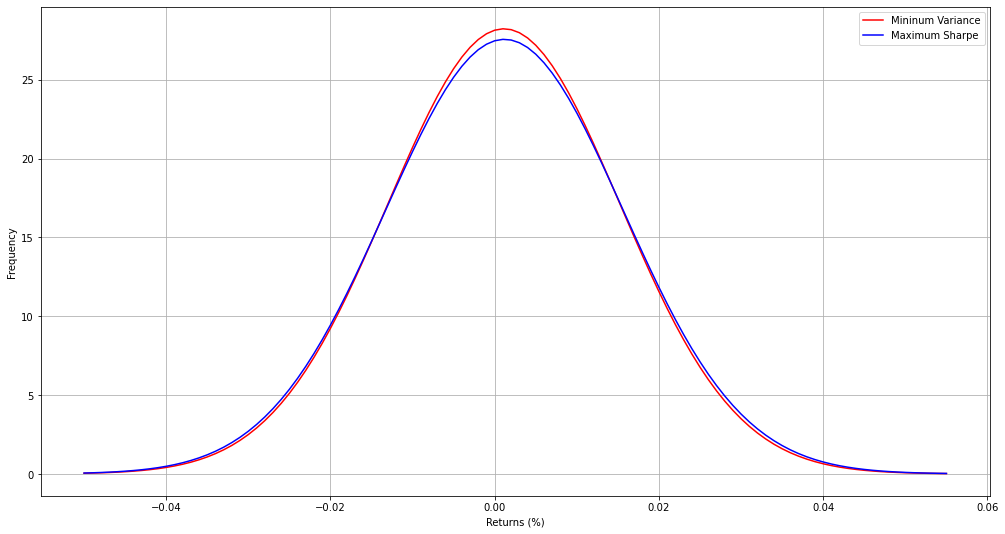

1 day mininum variance VaR with 95% confidence -2.212 %
mininum variance cutoff value: 97788.41
mininum variance historical VaR: 2211.59


1 day maximum sharpe VaR with 95% confidence -2.262 %
maximum sharpe cutoff value: 97737.98
maximum sharpe historical VaR: 2262.02


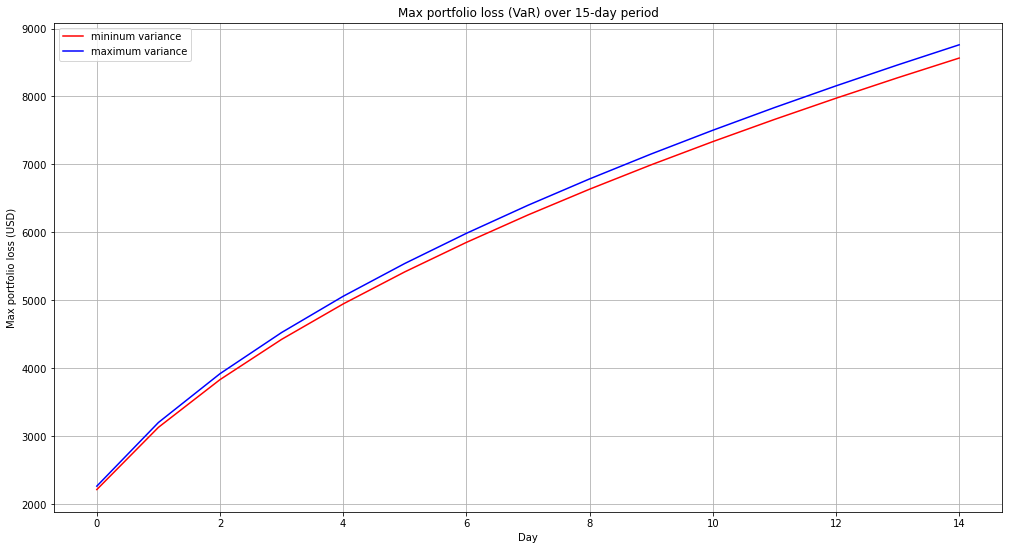

In [7]:
var = VaR(df)
ef_var = var.ef_var(min_var_weights, max_sharpe_weights)